In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATASET_PATH = "chinese_mnist.csv"

df = pd.read_csv(DATASET_PATH)
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [5]:
image_folder = "data"

def load_images(df, image_folder):
    images = []
    labels = []
    
    for _, row in df.iterrows():
        image_name = f"input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg"
        img_path = os.path.join(image_folder, image_name)
        
        if os.path.exists(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            img = img.astype(np.float32) / 255.0
            images.append(img)
            labels.append(row['value'])
            
    return np.array(images), np.array(labels)

X, y = load_images(df, image_folder)

print(f"Number of images in the data set: {X.shape[0]}")
print(f"The size of each picture: {X.shape[1:]}")  # (64, 64)
print(f"Number of classes in the data set: {len(np.unique(y))}")

unique_labels, label_counts = np.unique(y, return_counts=True)

for label, count in zip(unique_labels, label_counts):
    print(f"Class {label}: {count} pictures")

Number of images in the data set: 15000
The size of each picture: (64, 64)
Number of classes in the data set: 15
Class 0: 1000 pictures
Class 1: 1000 pictures
Class 2: 1000 pictures
Class 3: 1000 pictures
Class 4: 1000 pictures
Class 5: 1000 pictures
Class 6: 1000 pictures
Class 7: 1000 pictures
Class 8: 1000 pictures
Class 9: 1000 pictures
Class 10: 1000 pictures
Class 100: 1000 pictures
Class 1000: 1000 pictures
Class 10000: 1000 pictures
Class 100000000: 1000 pictures


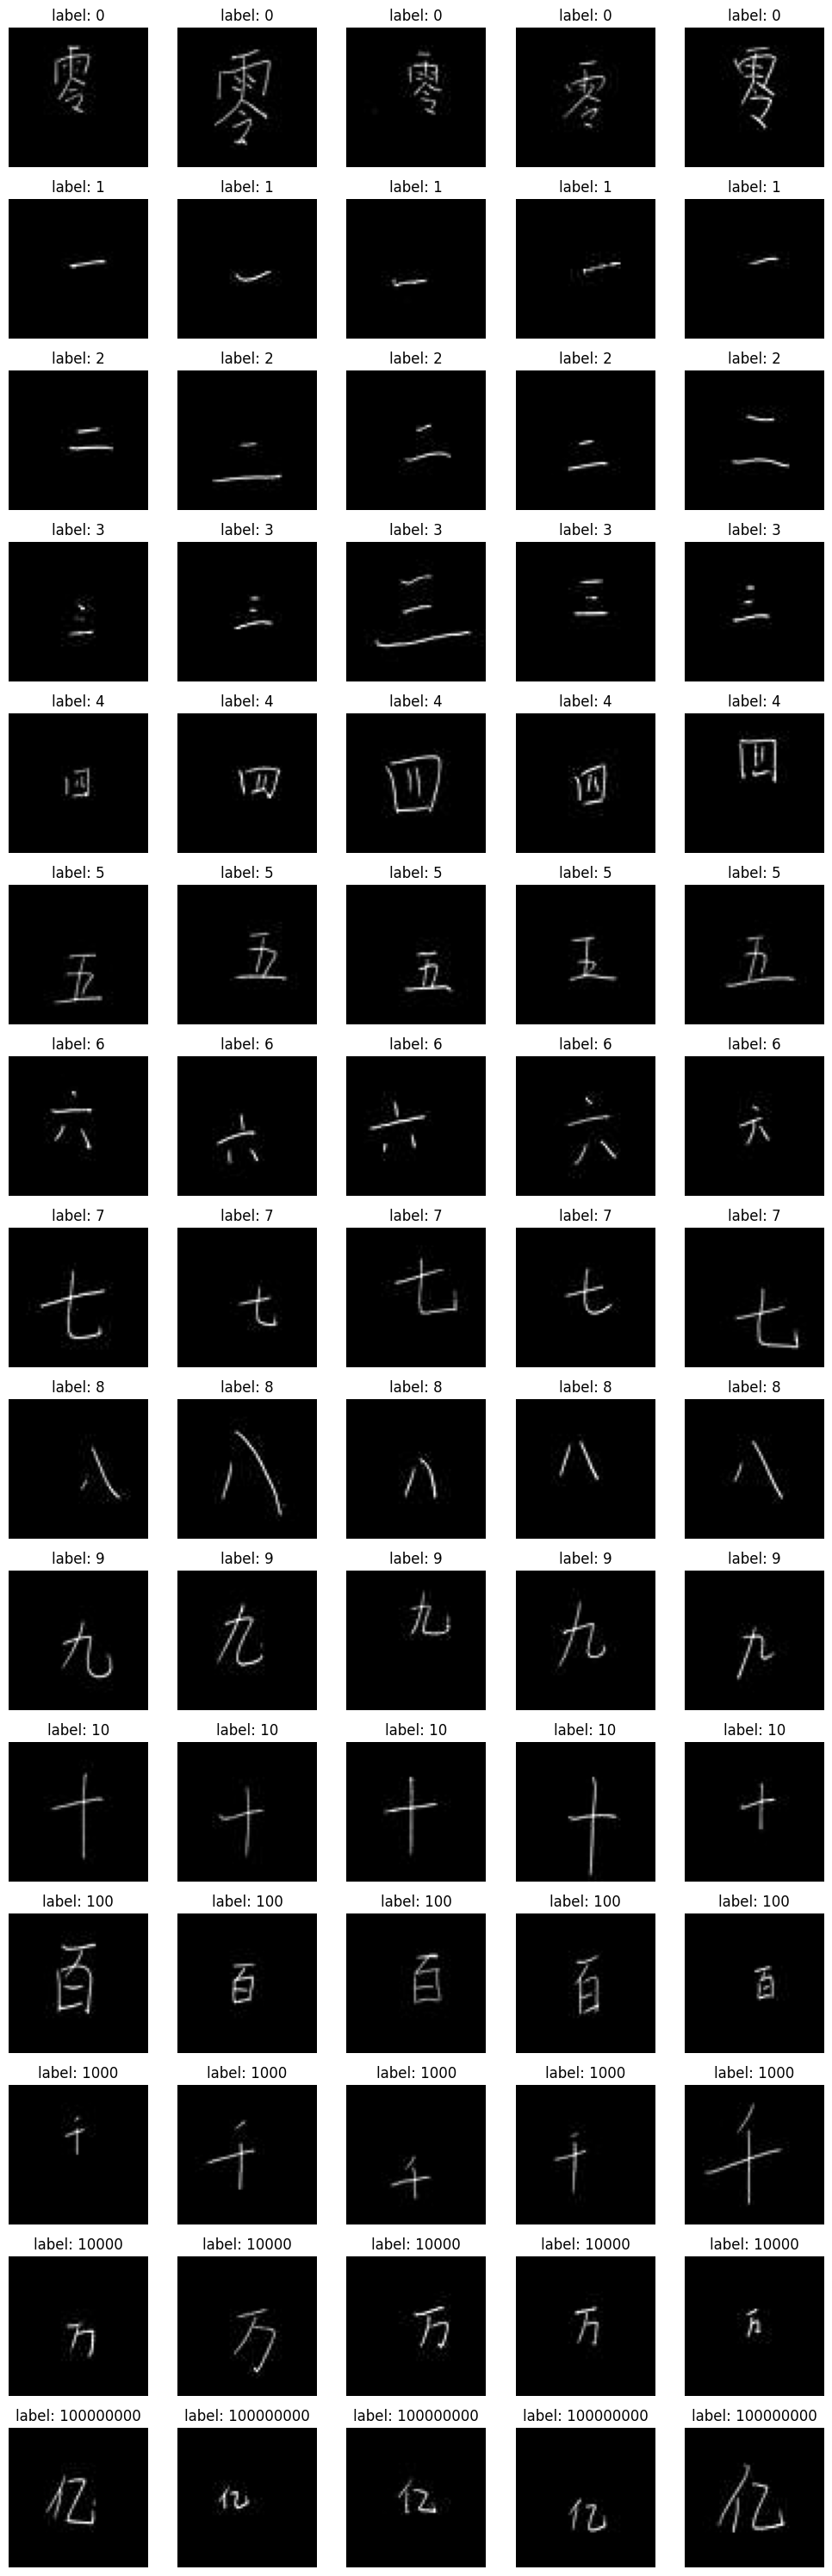

In [7]:
def plot_sample_images(X, y, num_classes=10, samples_per_class=5):
    unique_labels = np.unique(y)
    fig, axes = plt.subplots(len(unique_labels), samples_per_class, figsize=(samples_per_class * 2, len(unique_labels) * 2))

    for i, label in enumerate(unique_labels):
        class_indices = np.where(y == label)[0]
        selected_indices = np.random.choice(class_indices, min(samples_per_class, len(class_indices)), replace=False)

        for j, index in enumerate(selected_indices):
            ax = axes[i, j] if len(unique_labels) > 1 else axes[j]
            ax.imshow(X[index], cmap='gray')
            ax.set_title(f"label: {label}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_sample_images(X, y, num_classes=10, samples_per_class=5)

# train_size=5000, test_size=1000

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000, test_size=1000, stratify=y, random_state=100)

print(f"train set: {X_train.shape}, {y_train.shape}")
print(f"test set: {X_test.shape}, {y_test.shape}")

train set: (5000, 64, 64), (5000,)
test set: (1000, 64, 64), (1000,)


In [11]:
unique_classes, train_counts = np.unique(y_train, return_counts=True)
unique_classes, test_counts = np.unique(y_test, return_counts=True)

for cls, train_count, test_count in zip(unique_classes, train_counts, test_counts):
    print(f"class {cls}: train set {train_count} , test set {test_count} ")

class 0: train set 333 , test set 67 
class 1: train set 334 , test set 66 
class 2: train set 333 , test set 67 
class 3: train set 333 , test set 67 
class 4: train set 333 , test set 67 
class 5: train set 333 , test set 67 
class 6: train set 334 , test set 66 
class 7: train set 333 , test set 67 
class 8: train set 333 , test set 67 
class 9: train set 334 , test set 66 
class 10: train set 333 , test set 67 
class 100: train set 333 , test set 67 
class 1000: train set 334 , test set 66 
class 10000: train set 334 , test set 66 
class 100000000: train set 333 , test set 67 


In [13]:
# 重塑数据集
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train_flat.astype(np.float32)
X_test_flat = X_test_flat.astype(np.float32)

print(f"shape of train size: {X_train_flat.shape}, shape of test size: {X_test_flat.shape}")

shape of train size: (5000, 4096), shape of test size: (1000, 4096)


In [55]:
# KNN分类器，设置 k=3
KNN = KNeighborsClassifier(n_neighbors=3)

# DT分类器，使用默认参数
DT = DecisionTreeClassifier()

# SGD分类器，设置 max_iter=250
SGD = SGDClassifier(max_iter=250)

In [19]:
print("\nTraining KNN model...")
KNN.fit(X_train_flat, y_train)
print("KNN model training completed!")

print("\nTraining Decision Tree (DT) model...")
DT.fit(X_train_flat, y_train)
print("Decision Tree (DT) model training completed!")

print("\nTraining Stochastic Gradient Descent (SGD) model...")
SGD.fit(X_train_flat, y_train)
print("Stochastic Gradient Descent (SGD) model training completed!")

print("\nAll classifier training completed!")


Training KNN model...
KNN model training completed!

Training Decision Tree (DT) model...
Decision Tree (DT) model training completed!

Training Stochastic Gradient Descent (SGD) model...
Stochastic Gradient Descent (SGD) model training completed!

All classifier training completed!


In [23]:
y_KNN_predict = KNN.predict(X_test_flat)
y_DT_predict = DT.predict(X_test_flat)
y_SGD_predict = SGD.predict(X_test_flat)

In [43]:
## Using KNN
print('**************************KNN**************************')
accuracy = accuracy_score(y_test, y_KNN_predict)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_KNN_predict))

cm = confusion_matrix(y_test, y_KNN_predict)
print("Confusion Matrix:\n", cm)

**************************KNN**************************
Accuracy: 0.3540
              precision    recall  f1-score   support

           0       0.84      0.72      0.77        67
           1       0.15      0.94      0.25        66
           2       0.19      0.36      0.25        67
           3       0.24      0.19      0.21        67
           4       0.59      0.24      0.34        67
           5       0.29      0.07      0.12        67
           6       0.46      0.27      0.34        66
           7       0.57      0.19      0.29        67
           8       0.95      0.84      0.89        67
           9       0.67      0.30      0.42        66
          10       0.47      0.42      0.44        67
         100       0.86      0.18      0.30        67
        1000       0.42      0.17      0.24        66
       10000       0.54      0.30      0.39        66
   100000000       0.89      0.12      0.21        67

    accuracy                           0.35      1000
   macr

In [45]:
## Using DT
print('**************************DT**************************')
accuracy = accuracy_score(y_test, y_DT_predict)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_DT_predict))

cm = confusion_matrix(y_test, y_DT_predict)
print("Confusion Matrix:\n", cm)

**************************DT**************************
Accuracy: 0.2380
              precision    recall  f1-score   support

           0       0.46      0.42      0.44        67
           1       0.61      0.68      0.64        66
           2       0.18      0.22      0.20        67
           3       0.16      0.13      0.14        67
           4       0.22      0.21      0.22        67
           5       0.11      0.07      0.09        67
           6       0.15      0.18      0.16        66
           7       0.15      0.16      0.16        67
           8       0.29      0.30      0.29        67
           9       0.14      0.12      0.13        66
          10       0.40      0.34      0.37        67
         100       0.18      0.18      0.18        67
        1000       0.23      0.27      0.25        66
       10000       0.15      0.17      0.16        66
   100000000       0.12      0.10      0.11        67

    accuracy                           0.24      1000
   macro

In [47]:
## Using SGD
print('**************************SGD**************************')
accuracy = accuracy_score(y_test, y_SGD_predict)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_SGD_predict))

cm = confusion_matrix(y_test, y_SGD_predict)
print("Confusion Matrix:\n", cm)

**************************SGD**************************
Accuracy: 0.4010
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        67
           1       0.59      0.67      0.63        66
           2       0.34      0.28      0.31        67
           3       0.33      0.40      0.36        67
           4       0.52      0.52      0.52        67
           5       0.40      0.48      0.44        67
           6       0.28      0.17      0.21        66
           7       0.33      0.19      0.25        67
           8       0.44      0.51      0.47        67
           9       0.27      0.32      0.29        66
          10       0.37      0.55      0.44        67
         100       0.34      0.37      0.36        67
        1000       0.37      0.32      0.34        66
       10000       0.26      0.21      0.24        66
   100000000       0.37      0.28      0.32        67

    accuracy                           0.40      1000
   macr

# train_size=10000, test_size=1000

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=1000, stratify=y, random_state=100)

print(f"train set: {X_train.shape}, {y_train.shape}")
print(f"test set: {X_test.shape}, {y_test.shape}")

train set: (10000, 64, 64), (10000,)
test set: (1000, 64, 64), (1000,)


In [51]:
unique_classes, train_counts = np.unique(y_train, return_counts=True)
unique_classes, test_counts = np.unique(y_test, return_counts=True)

for cls, train_count, test_count in zip(unique_classes, train_counts, test_counts):
    print(f"class {cls}: train set {train_count} , test set {test_count} ")

class 0: train set 667 , test set 66 
class 1: train set 667 , test set 67 
class 2: train set 667 , test set 66 
class 3: train set 666 , test set 67 
class 4: train set 667 , test set 66 
class 5: train set 667 , test set 66 
class 6: train set 667 , test set 67 
class 7: train set 666 , test set 67 
class 8: train set 666 , test set 67 
class 9: train set 667 , test set 66 
class 10: train set 667 , test set 67 
class 100: train set 666 , test set 67 
class 1000: train set 667 , test set 67 
class 10000: train set 667 , test set 67 
class 100000000: train set 666 , test set 67 


In [53]:
# 重塑数据集
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train_flat.astype(np.float32)
X_test_flat = X_test_flat.astype(np.float32)

print(f"shape of train size: {X_train_flat.shape}, shape of test size: {X_test_flat.shape}")

shape of train size: (10000, 4096), shape of test size: (1000, 4096)


In [57]:
# KNN 分类器，设置 k=3
KNN = KNeighborsClassifier(n_neighbors=3)

# DT分类器，使用默认参数
DT = DecisionTreeClassifier()

# SGD分类器，设置 max_iter=250
SGD = SGDClassifier(max_iter=250)

In [59]:
print("\nTraining KNN model...")
KNN.fit(X_train_flat, y_train)
print("KNN model training completed!")

print("\nTraining Decision Tree (DT) model...")
DT.fit(X_train_flat, y_train)
print("Decision Tree (DT) model training completed!")

print("\nTraining Stochastic Gradient Descent (SGD) model...")
SGD.fit(X_train_flat, y_train)
print("Stochastic Gradient Descent (SGD) model training completed!")

print("\nAll classifier training completed!")


Training KNN model...
KNN model training completed!

Training Decision Tree (DT) model...
Decision Tree (DT) model training completed!

Training Stochastic Gradient Descent (SGD) model...
Stochastic Gradient Descent (SGD) model training completed!

All classifier training completed!


In [61]:
y_KNN_predict = KNN.predict(X_test_flat)
y_DT_predict = DT.predict(X_test_flat)
y_SGD_predict = SGD.predict(X_test_flat)

In [63]:
## Using KNN
print('**************************KNN**************************')
accuracy = accuracy_score(y_test, y_KNN_predict)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_KNN_predict))

cm = confusion_matrix(y_test, y_KNN_predict)
print("Confusion Matrix:\n", cm)

**************************KNN**************************
Accuracy: 0.4110
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        66
           1       0.17      1.00      0.30        67
           2       0.22      0.39      0.28        66
           3       0.36      0.25      0.30        67
           4       0.79      0.23      0.35        66
           5       0.62      0.23      0.33        66
           6       0.30      0.25      0.28        67
           7       0.50      0.24      0.32        67
           8       0.95      0.84      0.89        67
           9       0.76      0.33      0.46        66
          10       0.49      0.55      0.52        67
         100       0.93      0.21      0.34        67
        1000       0.76      0.43      0.55        67
       10000       0.69      0.40      0.51        67
   100000000       0.92      0.18      0.30        67

    accuracy                           0.41      1000
   macr

In [65]:
## Using DT
print('**************************DT**************************')
accuracy = accuracy_score(y_test, y_DT_predict)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_DT_predict))

cm = confusion_matrix(y_test, y_DT_predict)
print("Confusion Matrix:\n", cm)

**************************DT**************************
Accuracy: 0.3090
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        66
           1       0.65      0.78      0.71        67
           2       0.37      0.42      0.40        66
           3       0.20      0.16      0.18        67
           4       0.30      0.26      0.28        66
           5       0.29      0.30      0.29        66
           6       0.23      0.22      0.23        67
           7       0.30      0.30      0.30        67
           8       0.38      0.36      0.37        67
           9       0.17      0.15      0.16        66
          10       0.36      0.36      0.36        67
         100       0.21      0.21      0.21        67
        1000       0.24      0.28      0.26        67
       10000       0.08      0.09      0.09        67
   100000000       0.25      0.24      0.24        67

    accuracy                           0.31      1000
   macro

In [67]:
## Using SGD
print('**************************SGD**************************')
accuracy = accuracy_score(y_test, y_SGD_predict)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_SGD_predict))

cm = confusion_matrix(y_test, y_SGD_predict)
print("Confusion Matrix:\n", cm)

**************************SGD**************************
Accuracy: 0.4160
              precision    recall  f1-score   support

           0       0.51      0.74      0.60        66
           1       0.55      0.91      0.69        67
           2       0.37      0.33      0.35        66
           3       0.47      0.42      0.44        67
           4       0.50      0.47      0.48        66
           5       0.42      0.33      0.37        66
           6       0.35      0.31      0.33        67
           7       0.31      0.31      0.31        67
           8       0.54      0.46      0.50        67
           9       0.30      0.21      0.25        66
          10       0.37      0.54      0.44        67
         100       0.21      0.18      0.19        67
        1000       0.37      0.39      0.38        67
       10000       0.35      0.34      0.35        67
   100000000       0.49      0.28      0.36        67

    accuracy                           0.42      1000
   macr

The performance of the three models is not satisfactory, but the accuracy of the three models is improved when the data of the training set is increased from 5000 to 10000